In [13]:
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import plot_tree
from sklearn import tree
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(0)

# Random Forest Classifier
Working with the iris data set
### Loading Data

In [14]:
# creating an iris oject
iris = load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [15]:
#Analysing the data
# viewing all aspects of Iris 
# Obtain shape of df
print(iris.keys())
iris['feature_names']
iris['data'][0:5], iris['feature_names']

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


(array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2]]),
 ['sepal length (cm)',
  'sepal width (cm)',
  'petal length (cm)',
  'petal width (cm)'])

In [16]:
# putting the iris object into a dataframe
df = pd.DataFrame(iris.data, columns = iris.feature_names)
# looking at top 5 rows from df
df.head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2

In [17]:
# looking for Target variable
print(iris['target'])
print(iris['target_names'])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
['setosa' 'versicolor' 'virginica']


In [18]:
# Adding target to df
lst = [iris['target_names'][a1] for a1 in iris['target']]
df['species'] = lst
df

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
..                 ...               ...                ...               ...   
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1.8   

       species  
0       setosa  
1       setosa  
2       setosa  
3       setosa  
4       setosa  
..         ...  
145  virginica  
146  virginica  
147  virginica  
148  virginica  
149  virginica  

[150 rows x 5 columns]

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sepal length (cm)', ylabel='sepal width (cm)'>

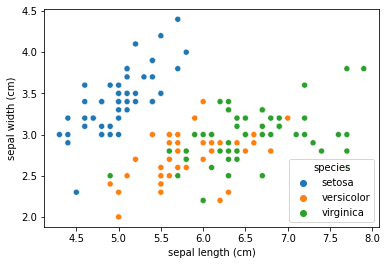

In [19]:
# viewing results through a scatterplot with species as a hue
sns.scatterplot(df['sepal length (cm)'],df['sepal width (cm)'],hue = df['species'])

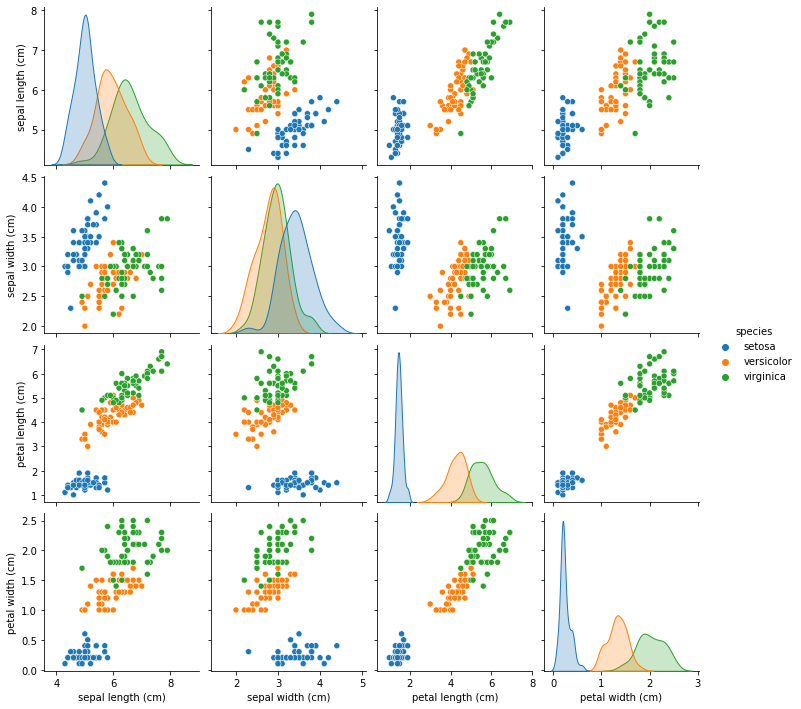

In [21]:
sns.pairplot(df, hue= 'species',corner = False)

### Creating Training and Test Data

In [23]:
#Dividing features and target variable:
x = df.iloc[:,0:-1]
y = df.iloc[:, -1]
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size =0.25, random_state=45)

In [24]:
##Validating the split:
len(x),len(x_train),len(x_test),len(y_train),len(y_test)

(150, 112, 38, 112, 38)

### Making and training Decision Trees

In [26]:
# import decisiontreeclassifier from sklearn
from sklearn.tree import DecisionTreeClassifier

In [27]:
# create decisiontreeclassifier object
dtree = DecisionTreeClassifier()
dtree

DecisionTreeClassifier()

In [28]:
##X_train, X_test, y_train, y_test
dtree.fit(x_train,y_train)

DecisionTreeClassifier()

### Predictions and Evaluation

In [30]:
pred = dtree.predict(x_test)
pred
list(zip(pred, y_test))

[('setosa', 'setosa'),
 ('setosa', 'setosa'),
 ('virginica', 'virginica'),
 ('setosa', 'setosa'),
 ('setosa', 'setosa'),
 ('setosa', 'setosa'),
 ('setosa', 'setosa'),
 ('virginica', 'virginica'),
 ('virginica', 'virginica'),
 ('virginica', 'virginica'),
 ('setosa', 'setosa'),
 ('virginica', 'virginica'),
 ('virginica', 'virginica'),
 ('virginica', 'virginica'),
 ('versicolor', 'virginica'),
 ('setosa', 'setosa'),
 ('virginica', 'virginica'),
 ('virginica', 'virginica'),
 ('setosa', 'setosa'),
 ('versicolor', 'versicolor'),
 ('versicolor', 'versicolor'),
 ('versicolor', 'versicolor'),
 ('virginica', 'virginica'),
 ('versicolor', 'versicolor'),
 ('setosa', 'setosa'),
 ('virginica', 'virginica'),
 ('versicolor', 'versicolor'),
 ('versicolor', 'versicolor'),
 ('setosa', 'setosa'),
 ('versicolor', 'versicolor'),
 ('versicolor', 'versicolor'),
 ('versicolor', 'versicolor'),
 ('versicolor', 'virginica'),
 ('virginica', 'virginica'),
 ('setosa', 'setosa'),
 ('virginica', 'virginica'),
 ('setos

In [32]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        14
  versicolor       0.82      1.00      0.90         9
   virginica       1.00      0.87      0.93        15

    accuracy                           0.95        38
   macro avg       0.94      0.96      0.94        38
weighted avg       0.96      0.95      0.95        38



In [34]:
pd.crosstab(y_test, pred, rownames=['Actual Species'],colnames=['Predicted Species'])

Predicted Species  setosa  versicolor  virginica
Actual Species                                  
setosa                 14           0          0
versicolor              0           9          0
virginica               0           2         13

### Tree Visualizations

In [38]:
importances = dtree.feature_importances_

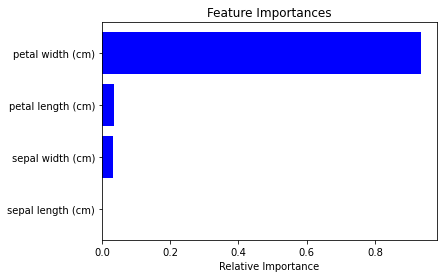

In [44]:
importances = dtree.feature_importances_
indices = np.argsort(importances)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color = 'b')
plt.yticks(range(len(indices)), [df.columns[:-1][i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

### Making and Training Random Forest Classifier

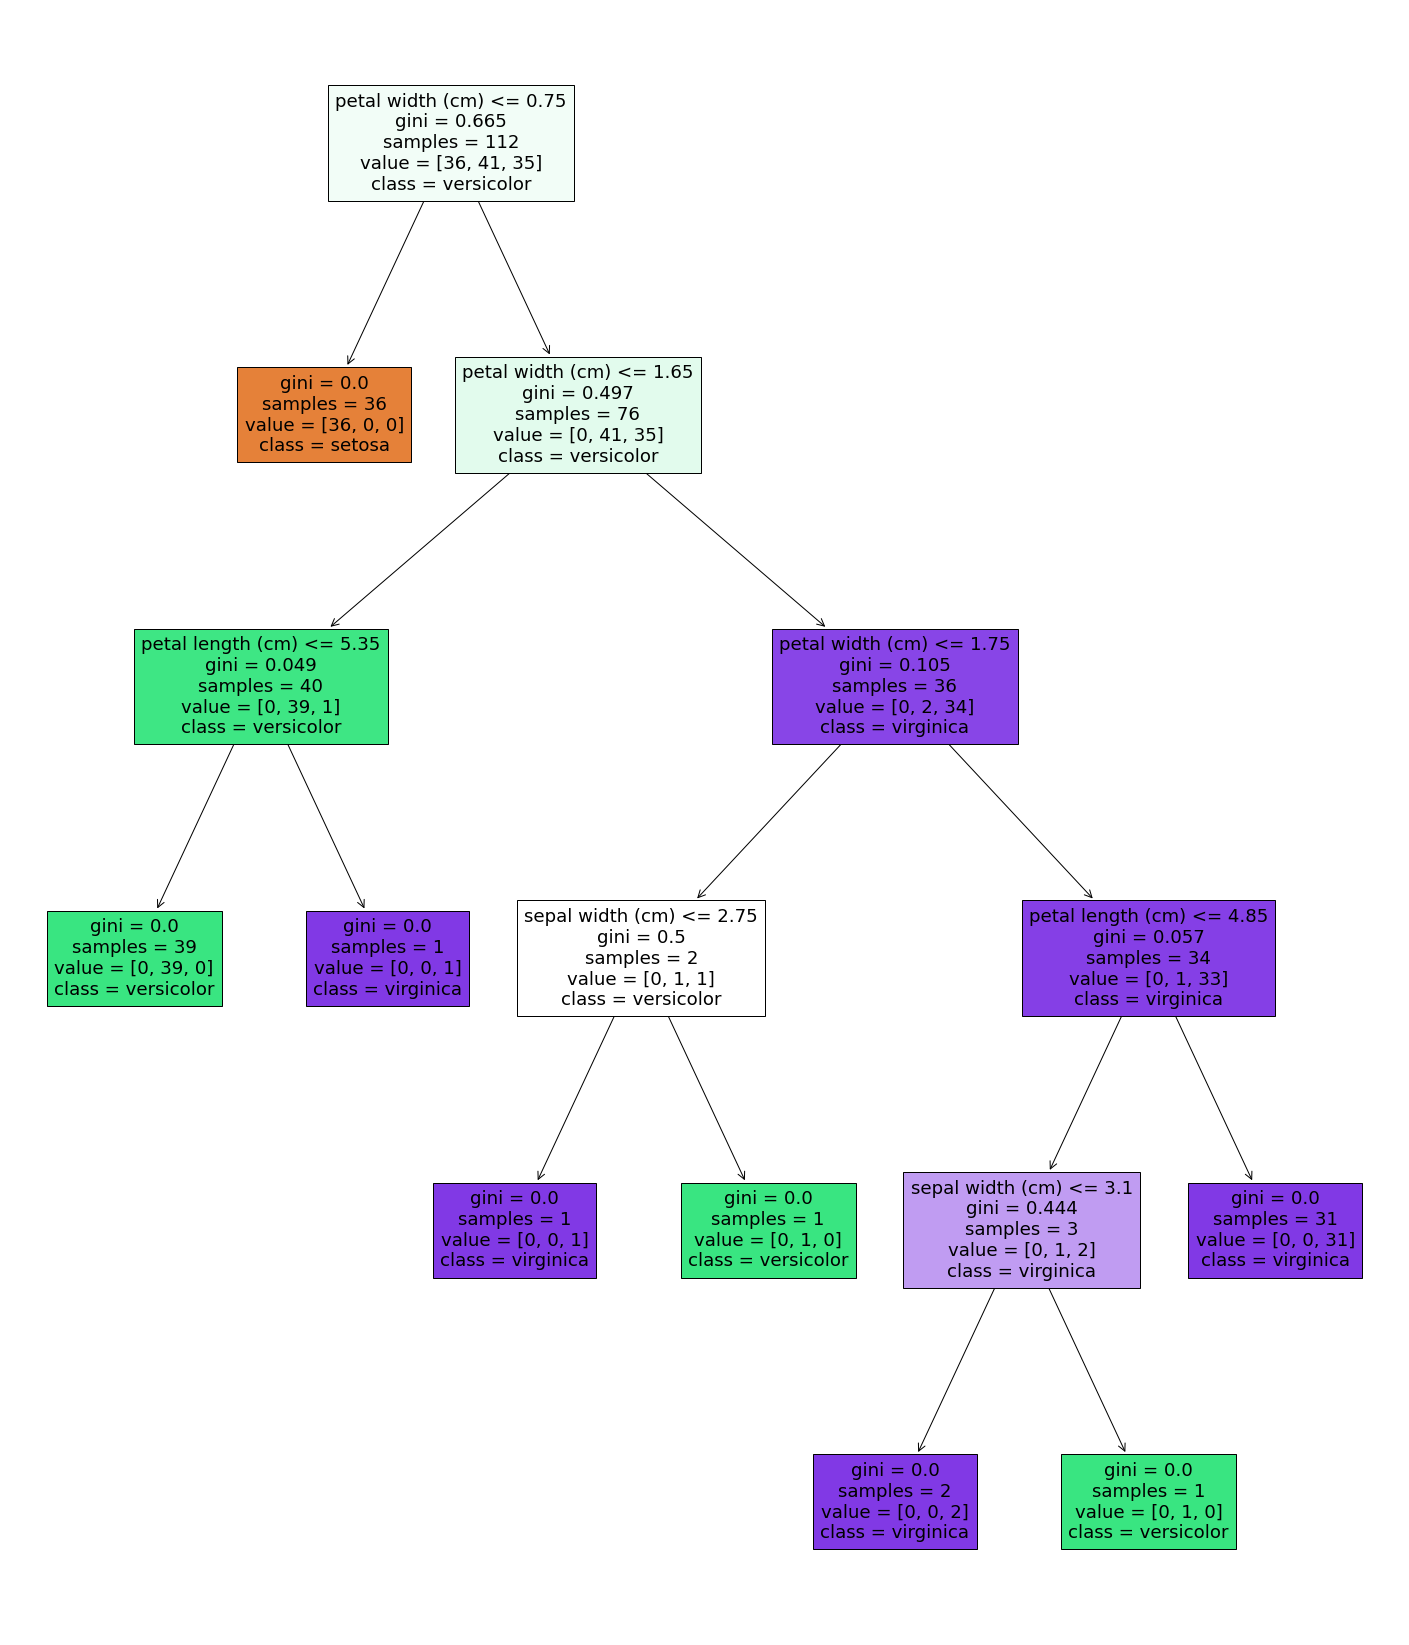

In [43]:
# making classifier object
fig = plt.figure(figsize=(25,30))
_ = tree.plot_tree(dtree, feature_names=iris.feature_names, class_names=iris.target_names, filled=True)
# training classifier


In [46]:
rf = RandomForestClassifier(n_jobs =2, random_state=42)
rf.fit(x_train, y_train)

RandomForestClassifier(n_jobs=2, random_state=42)

In [47]:
pred_rf = rf.predict(x_test)
list(zip(pred_rf, y_test))

[('setosa', 'setosa'),
 ('setosa', 'setosa'),
 ('virginica', 'virginica'),
 ('setosa', 'setosa'),
 ('setosa', 'setosa'),
 ('setosa', 'setosa'),
 ('setosa', 'setosa'),
 ('virginica', 'virginica'),
 ('virginica', 'virginica'),
 ('virginica', 'virginica'),
 ('setosa', 'setosa'),
 ('virginica', 'virginica'),
 ('virginica', 'virginica'),
 ('virginica', 'virginica'),
 ('versicolor', 'virginica'),
 ('setosa', 'setosa'),
 ('virginica', 'virginica'),
 ('virginica', 'virginica'),
 ('setosa', 'setosa'),
 ('versicolor', 'versicolor'),
 ('versicolor', 'versicolor'),
 ('versicolor', 'versicolor'),
 ('virginica', 'virginica'),
 ('versicolor', 'versicolor'),
 ('setosa', 'setosa'),
 ('virginica', 'virginica'),
 ('versicolor', 'versicolor'),
 ('versicolor', 'versicolor'),
 ('setosa', 'setosa'),
 ('versicolor', 'versicolor'),
 ('versicolor', 'versicolor'),
 ('versicolor', 'versicolor'),
 ('versicolor', 'virginica'),
 ('virginica', 'virginica'),
 ('setosa', 'setosa'),
 ('virginica', 'virginica'),
 ('setos

### Evaluating success

In [50]:
print(classification_report(y_test, pred_rf))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        14
  versicolor       0.82      1.00      0.90         9
   virginica       1.00      0.87      0.93        15

    accuracy                           0.95        38
   macro avg       0.94      0.96      0.94        38
weighted avg       0.96      0.95      0.95        38



In [48]:
##Lets look at the performance indexes
pd.crosstab(y_test, pred_rf, rownames=['Actual Species'],colnames=['Predicted Species'])

Predicted Species  setosa  versicolor  virginica
Actual Species                                  
setosa                 14           0          0
versicolor              0           9          0
virginica               0           2         13

In [216]:
##Looking at the confussion matrix
print (confusion_matrix(y_test,pred_rf))

Predicted Species  setosa  versicolor  virginica
Actual Species                                  
setosa                 14           0          0
versicolor              0           9          0
virginica               0           2         13

### Looking at Feature Importance

In [52]:
# viewing probabilities of the first 10 observations (then look at [10:20])
#clf.predict_proba(test[features])[10:20]
rf.predict_proba(x_test)[10:20]
# how many leaf nodes did we generate?
# any ties are awarded to??
# class 1 79%, class 2 21%

array([[1.  , 0.  , 0.  ],
       [0.  , 0.05, 0.95],
       [0.  , 0.08, 0.92],
       [0.  , 0.  , 1.  ],
       [0.  , 0.79, 0.21],
       [1.  , 0.  , 0.  ],
       [0.  , 0.  , 1.  ],
       [0.  , 0.06, 0.94],
       [1.  , 0.  , 0.  ],
       [0.  , 0.99, 0.01]])

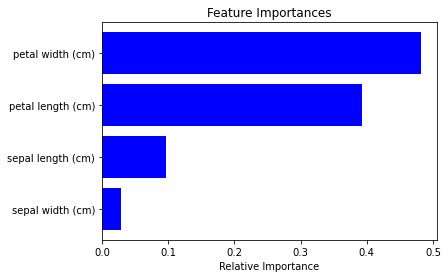

In [53]:
importances = rf.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color = 'b')
plt.yticks(range(len(indices)), [df.columns[:-1][i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()